# PISA Data Analysis
### Ali Rostami

Here, we are going to analyze a data set from the PISA program which is an international assessment program of education and schooloing systems through different countries. Particularly, this data, which we analyze here, contian the assessments of performance of students in Math, Science, and Reading. We have already cleaned the data and removed several unnecessary and null data using other python files. Here, we just do a few first steps for the data preparation in the followings, like renaming the columns. 

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('pisa2012_filtered_clean.csv')
df.rename({'CNT': 'Country Code', 'ST03Q02': 'Birth Year', 'ST04Q01': 'Gender',
           'STUDREL': 'Teacher Student Relations', 'TCHBEHFA': 'Teacher Behavior',
           'COBN_S': 'Birth Country', 'COBN_M': 'Birth Country of Mother',
           'COBN_F': 'Birth Country of Father',
           'EXAPPLM': 'Experience with Applied Math in School',
           'EXPUREM': 'Experience with Pure Math in School',
           'avg Science Score': 'Average Science Score',
           'Avg Math Score': 'Average Math Score',
           'Avg Reading Score': 'Average Reading Score',
           'WEALTH': 'Wealth'}, axis='columns', inplace=True)
# df.info(), df.head()

In [3]:
# df = df.replace(['Connecticut (USA)', 'Florida (USA)', 'Massachusetts (USA)', 'United States of America'], 'USA')
# df = df.replace(['Perm(Russian)', 'Russian Federation', 'Perm(Russian Federation)'], 'Russia')
# def correct_country_names(country):
# #     print(country)
# #     print(country.find('United Kingdom'))
#     if country.find('United Kingdom') != -1:
#         return 'UK'
#     elif country.find('ESP') != -1:
#         return 'Spain'
#     elif country.find('DEU') != -1:
#         return 'Germany'
#     else:
#         return country

# df['Test'] = df['Birth Country'].apply(correct_country_names)

In [4]:
res = df.groupby('Country Code').count()['Gender']
res.keys()

Index(['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China-Shanghai', 'Chinese Taipei',
       'Colombia', 'Connecticut (USA)', 'Costa Rica', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Florida (USA)',
       'France', 'Germany', 'Greece', 'Hong Kong-China', 'Hungary', 'Iceland',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Korea', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao-China', 'Malaysia', 'Massachusetts (USA)',
       'Mexico', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway',
       'Perm(Russian Federation)', 'Peru', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russian Federation', 'Serbia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Tunisia', 'Turkey', 'United Arab Emirates',
       'United Kingdom', 'United States of America', 'Uruguay', 'Vietnam'],
 

In [5]:
res = df.groupby('Birth Country').count()['Gender']
res.keys()

Index(['A European country ', 'A Sub-Saharan country (Africa excl. Maghreb) ',
       'A country from European Union (PRT)', 'Afghanistan', 'Africa ',
       'African country with Portuguese as the official language ', 'Albania',
       'An Eastern European country',
       'An Eastern European country outside the EU ', 'Andalusia (ESP)',
       ...
       'United Kingdom (England) ', 'United Kingdom (Great Britain) ',
       'United Kingdom (Northern Ireland)', 'United Kingdom (Scotland)',
       'United Kingdom (excl.Scotland) ', 'United States of America ',
       'Uruguay', 'Valencian Community (ESP)', 'Viet Nam ', 'Yemen'],
      dtype='object', name='Birth Country', length=212)

## Explorative Data Analysis

Here, we explore the data using different visualization for a better understanding of the data and the relations in it. First we look how is the distribution of the number of assessed students over the countries. In the following bar chart, we can see that the most of data is from Mexico, Italy, Spain, and Canada. Also, we can see that there are only a few data from Lichtenstein and Iceland. 

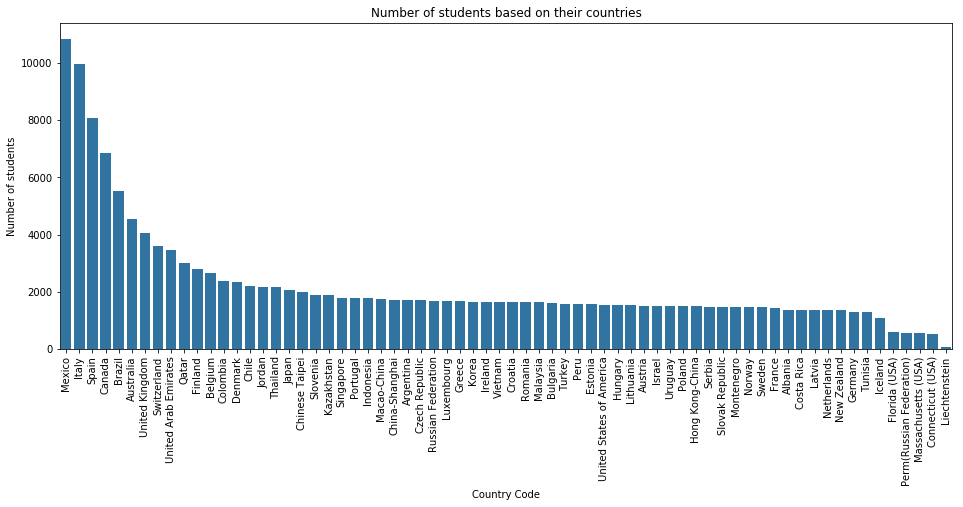

In [6]:
plt.figure(figsize = [16, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Country Code', color = base_color, order=df['Country Code'].value_counts().index)
plt.title('Number of students based on their countries')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

Now, we can look at the distribution of the scores of Math, Science, and Reading considering all students from all countries. Before doing this, we should first decide if we want to use the maximum or the average of these scores. By looking at the following figures, we can see that both average and maximum scores are behaving similarly, i.e., they have high positive correlations. This shows that there is no difference considering each of them. Therefore, we just consider the maximum scores from this point. 

In [ ]:
# plt.figure(figsize = [18, 8])
# plt.subplot(1, 3, 1)
pair_plot = sb.pairplot(data = df, vars=["Average Math Score", "Max Math Score"]);
pair_plot.fig.suptitle("Correlation between average and max math score", y = 1);

In [ ]:
pair_plot = sb.pairplot(data = df, vars=["Average Reading Score", "Max Reading Score"]);
pair_plot.fig.suptitle("Correlation between average and max reading score", y = 1);

In [ ]:
pair_plot = sb.pairplot(data = df, vars=["Average Science Score", "Max Science Score"]);
pair_plot.fig.suptitle("Correlation between average and max science score", y = 1);

Now, we see how related are the scores of Reading, Math, and Science to each other.

In [ ]:
df.plot.scatter(x='Max Reading Score', y='Max Math Score');

In [ ]:
df.plot.scatter(x='Max Reading Score', y='Max Science Score');

Now, we want to compare the students based on the birht place of himself/herself and his/her parents. The following visualization shows that the most of students have the same of birthplace as their parents.

In [ ]:
df['Merged Birth Countries'] = df['Birth Country of Mother'] + "," +  df['Birth Country of Father'] + "," + df['Birth Country'];

def count_distinct_countries(str):
    s = set()
    for t in str.split(","):
        s.add(t)
    return len(s)

df['Count Distinct Countries'] = df['Merged Birth Countries'].apply(count_distinct_countries);
res = df.groupby('Count Distinct Countries').sum()['Birth Year']
res.plot.bar(logy=True)
plt.title('Number of b based on the distinct countries of their parents and himself/herself')
plt.ylabel('Number of students');

In [ ]:
plt.figure(figsize = [17, 6])
plt.subplot(1, 3, 1)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Max Math Score']);
plt.subplot(1, 3, 2)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Max Reading Score']);
plt.subplot(1, 3, 3)
sb.boxplot(x = df['Count Distinct Countries'], y = df['Max Science Score']);

Another intersting factor is the distribution of different scores based on countries. 

In [ ]:
plt.figure(figsize = [17, 6])

df.groupby('Birth Country').sum()
# math_score_country_order = df.groupby('Country')['Math Score'].mean().sort_values(ascending = False).index
# reading_score_country_order = df.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index
# science_score_country_order = df.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index

# plt.subplot(1, 3, 1)
# sb.boxplot(x = df['Math Score'], y = df['Country'], order = math_score_country_order, color = sb.color_palette()[9]);
# plt.ylabel('Countries (ordered descendingly by score ranking)')
# plt.title('Math score distributions by country');

# plt.subplot(1, 3, 2)
# sb.boxplot(x = df['Reading Score'], y = df['Country'], order = reading_score_country_order, color = sb.color_palette()[9]);
# plt.ylabel(''); # Remove the redundant label
# plt.title('Reading score distributions by country');

# plt.subplot(1, 3, 3)
# sb.boxplot(x = df['Science Score'], y = df['Country'], order = science_score_country_order, color = sb.color_palette()[9]);
# plt.ylabel(''); # Remove the redundant label
# plt.title('Science score distributions by country');

In [ ]:
res = df.groupby('Gender').mean()[['Average Math Score','Average Reading Score','Average Science Score']]
math = [res['Average Math Score'][0],res['Average Math Score'][1]]
reading = [res['Average Reading Score'][0],res['Average Reading Score'][1]]
science = [res['Average Science Score'][0],res['Average Science Score'][1]]

female = [res['Average Math Score'][0],res['Average Reading Score'][0],res['Average Science Score'][0]]
male   = [res['Average Math Score'][1],res['Average Reading Score'][1],res['Average Science Score'][1]]
index = ['Average Math Score', 'Average Reading Score', 'Average Science Score']
df = pd.DataFrame({'female': female,'male': male}, index=index)
ax = df.plot.bar(rotation='vertical')
# plt.figure(figsize = [14, 6])
# plt.subplot(1, 3, 1)
# df.groupby('Gender').mean().plot.bar(title='Test');
# plt.xticks(rotation='horizontal');
# plt.subplot(1, 3, 2)
# df.groupby('Gender')['Average Reading Score'].mean().plot.bar(title='Test');
# plt.xticks(rotation='horizontal');
# plt.subplot(1, 3, 3)
# df.groupby('Gender')['Average Science Score'].mean().plot.bar(title='Test');
# plt.xticks(rotation='horizontal');

In [ ]:
df.plot.scatter(x='Experience with Pure Math in School',y='Max Math Score')

In [ ]:
#df[['Average Math Score','Max Math Score','Average Reading Score','Max Reading Score']].hist()
plt.figure(figsize = [14, 18])
plt.subplot(3, 2, 1)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Average Math Score'])#, bins = bin_edges)
plt.title("Number of students for different average Math scores")
plt.xlabel('Average Math Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 2)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Max Math Score'])#, bins = bin_edges)
plt.title("Number of students for different max Math scores")
plt.xlabel('Max Math Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 3)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Average Reading Score'])#, bins = bin_edges)
plt.title("Number of students for different average Reading scores")
plt.xlabel('Average Reading Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 4)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Max Reading Score'])#, bins = bin_edges)
plt.title("Number of students for different max Reading scores")
plt.xlabel('Max Reading Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 5)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Average Science Score'])#, bins = bin_edges)
plt.title("Number of students for different average Science scores")
plt.xlabel('Average Science Score');
plt.ylabel('Number of students')

plt.subplot(3, 2, 6)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(df['Max Science Score'])#, bins = bin_edges)
plt.title("Number of students for different max Science scores")
plt.xlabel('Max Science Score');
plt.ylabel('Number of students')

In [ ]:
# plt.figure(figsize = [14, 6])
# plt.subplot(1, 2, 1)
# #bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
# plt.hist(df['Teacher Student Relations'])#, bins = bin_edges)
# plt.title("Teacher student relations")
# plt.xlabel('Teacher student relations');
# plt.ylabel('Number of students')

# plt.subplot(1, 2, 2)
# #bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
# plt.hist(df['Teacher Behavior'])#, bins = bin_edges)
# plt.title("Teacher Behavior")
# plt.xlabel('Teacher Behavior');
# plt.ylabel('Number of students')
df[['Teacher Student Relations','Teacher Behavior']].corr()

In [ ]:
grid = sb.pairplot(data = df, vars=["Average Math Score", "Max Math Score"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1);